In [3]:
from AdaptiveFusionGatingNet import AdaptiveFusionGatingNet
import torch 
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
import torchvision.models 

In [4]:
transform = transforms.Compose([transforms.Scale((224, 224)), transforms.ToTensor()])

C:\Users\Rohan\Anaconda3\envs\multimodal_detection\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


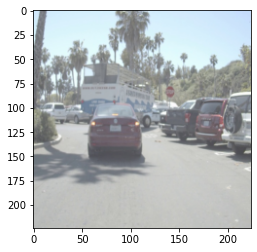

In [5]:
img = Image.open("D:/FLIR/val/RGB_adjusted/9858.jpg").convert('RGB')
img_transform = transform(img)
img_transform_np = img_transform.numpy()
img_transform_np = np.moveaxis(img_transform_np, 0, 2)
plt.imshow(img_transform_np)


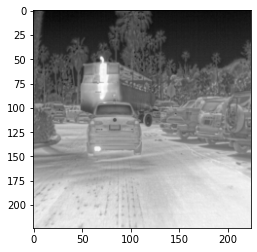

In [9]:
img_thermal = Image.open("D:/FLIR/val/thermal_8_bit_adjusted/9858.jpeg").convert('RGB')
img_transform_thermal = transform(img_thermal)
img_transform_np = img_transform_thermal.numpy()
img_transform_np = np.moveaxis(img_transform_np, 0, 2)
plt.imshow(img_transform_np)

In [10]:
GatingNet = AdaptiveFusionGatingNet()
GatingNet.eval()
GatingNet.cuda()
GatingNet.load_state_dict(torch.load("./FLIR_Gating.pt"))

<All keys matched successfully>

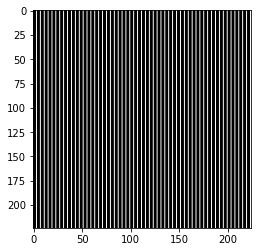

In [25]:
img = torch.empty(3,224,224)
img_transform = transforms.ToPILImage()(img)
img_transform = transform(img_transform)
img_transform_np = img_transform.numpy()
img_transform_np = np.moveaxis(img_transform_np, 0, 2)
plt.imshow(img_transform_np)

In [26]:
GatingNet(img_transform.unsqueeze(0).cuda(), img_transform_thermal.unsqueeze(0).cuda())

tensor([[0.9698]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [27]:
import cv2

(512, 640)


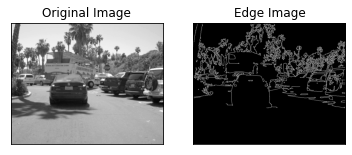

In [99]:
img = cv2.imread("D:/FLIR/val/RGB_adjusted/9858.jpg",0)
#img = cv2.bitwise_not(img)
plt.imshow(img)
print(img.shape)

edges = cv2.Canny(img,20,300)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

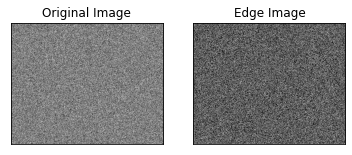

In [86]:
img_rand = np.random.randint(255, size=(512,640),dtype=np.uint8)


edges_rand = cv2.Canny(img_rand,10,100)
plt.subplot(121),plt.imshow(img_rand,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_rand,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

(512, 640)


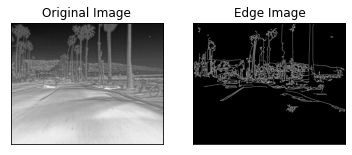

In [102]:
img_2 = cv2.imread("D:/FLIR/val/thermal_8_bit_adjusted/9870.jpeg",0)
plt.imshow(img_2)
print(img_2.shape)


edges_2 = cv2.Canny(img_2,20,300)
plt.subplot(121),plt.imshow(img_2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_2,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
from skimage.measure import compare_ssim

In [103]:
(score, difference) = compare_ssim(edges, edges_2, full=True)
print (score, difference)

0.5727692817561105 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


C:\Users\Rohan\Anaconda3\envs\multimodal_detection\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


In [42]:
print (score, difference)

0.5985357540552807 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
